In [217]:
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
import warnings
warnings.filterwarnings("ignore")

In [218]:
# load the dataset
df = pd.read_csv('FODS-A2.csv')
df.head()

,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,...,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,Appliances
0,21.20,33.290,19.823333,31.790000,23.463333,38.230000,20.50,31.73,19.200000,39.363333,...,29.230000,9.85,756.183333,41.833333,4.833333,40.0,-2.67,42.017180,42.017180,290
1,21.79,38.500,19.500000,40.633333,22.500000,37.900000,21.00,37.90,20.033333,47.290000,...,40.326667,6.90,754.000000,75.000000,4.000000,40.0,2.80,24.624380,24.624380,50
2,22.39,41.390,20.200000,43.790000,24.500000,39.333333,20.10,38.26,19.390000,48.090000,...,42.060000,10.10,756.433333,68.000000,5.833333,40.0,4.45,3.731260,3.731260,260
3,24.00,30.260,24.390000,26.963333,23.390000,33.400000,22.79,31.20,21.033333,40.626667,...,35.500000,19.10,760.000000,31.000000,4.000000,40.0,1.50,1.058826,1.058826,50
4,20.05,38.245,17.600000,41.000000,21.100000,37.200000,19.89,36.40,18.200000,43.560000,...,38.863333,0.10,754.600000,99.000000,1.000000,32.0,-0.10,39.248108,39.248108,30


In [219]:
df.isnull().sum()#any missing values in column

T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
Appliances     0
dtype: int64

In [220]:
df[df.isnull().any(axis=1)]# any missing values in row

,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,...,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,Appliances


In [221]:
X=df.iloc[:,0:26]
y=df.iloc[:,-1]
#min max normalize
X_max=X.max()
X_min=X.min()
X=(X-X_min)/(X_max-X_min)
y_max=y.max()
y_min=y.min()
y=(y-y_min)/(y_max-y_min)

In [222]:
order = list(range(len(y)))

shuffle = random.sample(order, int(len(order) * 0.8))

rem = [i for i in order if i not in shuffle]

In [223]:
# train test split
X_train = X.iloc[shuffle,:]
y_train = y.iloc[shuffle]
X_test = X.iloc[rem,:]
y_test = y.iloc[rem]

In [224]:
X_train

,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
3478,0.560718,0.361047,0.271990,0.559179,0.340874,0.451784,0.579710,0.313460,0.234704,0.257393,...,0.334027,0.456597,0.337097,0.751163,0.613333,0.142857,0.969231,0.320255,0.069866,0.069866
7742,0.497360,0.590482,0.345700,0.697859,0.307537,0.808226,0.265700,0.823848,0.283036,0.361902,...,0.083247,0.816497,0.412903,0.886047,0.960000,0.357143,0.923077,0.635036,0.008043,0.008043
5606,0.855333,0.666777,0.493120,0.868140,0.757590,0.665213,0.886775,0.702929,0.828394,0.303503,...,0.981121,0.833695,0.551613,0.397674,0.977778,0.071429,0.769231,0.835766,0.343556,0.343556
1847,0.584301,0.303633,0.294840,0.546094,0.385324,0.333385,0.479167,0.239386,0.302581,0.243359,...,0.479709,0.293995,0.329032,0.768217,0.884444,0.285714,0.753846,0.475365,0.072813,0.072813
1225,0.475185,0.422877,0.324324,0.573850,0.283367,0.627824,0.379529,0.632340,0.339866,0.312375,...,0.312175,0.757559,0.193548,0.769767,0.946667,0.214286,0.953846,0.315693,0.371755,0.371755
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,0.472017,0.608038,0.345700,0.710646,0.299202,0.762891,0.579710,0.715598,0.259560,0.639059,...,0.223032,0.767591,0.479677,0.701938,0.740000,0.702381,0.600000,0.597172,0.944438,0.944438
1751,0.477825,0.601745,0.326781,0.723434,0.432551,0.755777,0.443841,0.795393,0.326482,0.518770,...,0.386056,0.900098,0.442581,0.798837,0.982222,0.285714,0.479487,0.683850,0.715630,0.715630
6000,0.571278,0.400574,0.512285,0.478241,0.416716,0.426858,0.552536,0.430744,0.417304,0.244712,...,0.576136,0.516790,0.470000,0.739147,0.664444,0.083333,0.356410,0.536953,0.210384,0.210384
1489,0.627244,0.313570,0.368550,0.509318,0.474223,0.398349,0.512681,0.486450,0.465105,0.242357,...,0.561915,0.452835,0.525806,0.479070,0.488889,0.571429,0.600000,0.478558,0.571298,0.571298


In [225]:
def find_theta(x, y):
    theta = np.dot(np.linalg.pinv(np.dot(x.T, x)), np.dot(x.T, y))
    return theta

In [226]:
def predict(x, theta):
    pred = np.dot(x, theta)
    return pred

In [227]:
def linear_regression(train_x,train_y,test_x,test_y):
    theta = find_theta(train_x,train_y)
    y_pred_train = predict(train_x, theta)
    # calculate rmse train
    y_pred_train = np.array(y_pred_train)
    train_y = np.array(train_y)
    rmse_train = np.sqrt(np.sum((y_pred_train - train_y)**2)/len(train_y))

    # calculate rmse test
    y_pred_test = predict(test_x, theta)
    y_pred_test = np.array(y_pred_test)
    rmse_test = np.sqrt(np.sum((y_pred_test - test_y)**2)/len(train_y))

    return rmse_train,rmse_test

In [228]:
def linear_regression_backward(feature,train_x,train_y,test_x,test_y):
    # REMOVE feature from train_x and test_x
    # convert to np
    # a=train_x.tolist()
    # a.remove(feature)
    # b= test_x.copy()
    # b.remove(feature)
    train,test=linear_regression(train_x,train_y,test_x,test_y)
    return train,test

In [229]:
rmse_train=[]
rmse_test=[]
def backward_selection(X_train,y_train,X_test,y_test):
    # backward selection
    features = list(X_train.columns)
    while len(features) > 0:
        # remove those feature which have least impact
        features_with_pval = []
        feature_backward=[]
        X1 = np.ones((len(X_train), 1))
        X2 = np.ones((len(X_test), 1))
        train,test=linear_regression(np.c_[X_train[features],X1], y_train, np.c_[X_test[features],X2], y_test)
        features_with_pval.append((train,test))
        for feature in features:
            # remove feature from features 
            X1 = np.ones((len(X_train), 1))
            X2 = np.ones((len(X_test), 1))
            a=features.copy()
            a.remove(feature)
            train1,test1=linear_regression_backward(feature,np.c_[X_train[a],X1], y_train, np.c_[X_test[a],X2], y_test)
            feature_backward.append((feature, train1,test1))
        # compare feature_with_pval and feature_backward and remove feature with least impact
        feature_backward.sort(key=lambda x: x[1])
        features_with_pval.sort(key=lambda x: x[1])
        print('feature with least impact: ', feature_backward[0][0])
        features.remove(feature_backward[0][0])
        rmse_train.append(feature_backward[0][1])
        rmse_test.append(feature_backward[0][2]*2)
        print("RMSE train: ", feature_backward[0][1])
        print("RMSE test: ", feature_backward[0][2]*2)
        print('features left: ', features)
    return rmse_train,rmse_test

In [230]:
selected = backward_selection(X_train,y_train,X_test,y_test)

feature with least impact:  rv1
RMSE train:  0.10978422151330516
RMSE test:  0.11658266023600317
features left:  ['T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint', 'rv2']
feature with least impact:  RH_out
RMSE train:  0.1097843954407821
RMSE test:  0.11659247342131872
features left:  ['T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'Windspeed', 'Visibility', 'Tdewpoint', 'rv2']
feature with least impact:  Tdewpoint
RMSE train:  0.10978455238348325
RMSE test:  0.1165920166057929
features left:  ['T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'Windspeed', 'Visibility', 'rv2']
feature with least impact:  rv2
RMSE train:  0.1097847630446883

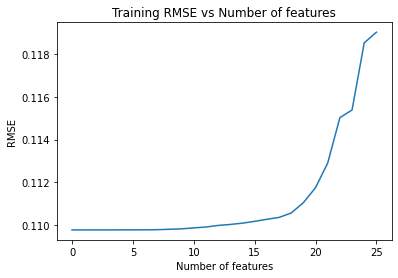

In [231]:
# plot rmse train 
plt.plot(rmse_train)
plt.xlabel('Number of features')
plt.ylabel('RMSE')
plt.title('Training RMSE vs Number of features')
plt.show()

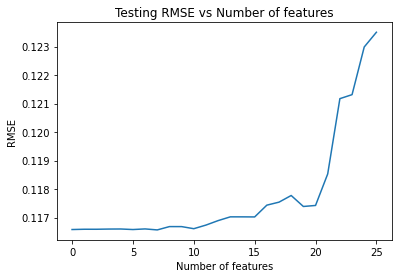

In [232]:
# plot rmse test
plt.plot(rmse_test)
plt.xlabel('Number of features')
plt.ylabel('RMSE')
plt.title('Testing RMSE vs Number of features')
plt.show()

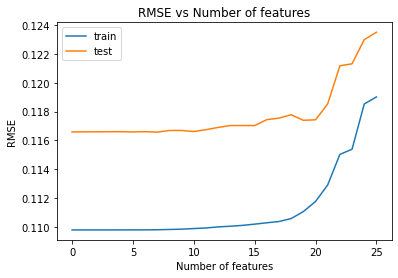

In [233]:
# plot rmse train and test
plt.xlabel('Number of features')
plt.ylabel('RMSE')
plt.title('RMSE vs Number of features')
plt.plot(rmse_train, label='train')
plt.plot(rmse_test, label='test')
plt.legend()
plt.show()